In [2]:
import sys
sys.path.append('../src')

import numpy as np 
import pickle

from FSMextractor import *

from sklearn.metrics import silhouette_score



     

Using TensorFlow backend.


In [45]:
BATCH_SIZE = 10
MODEL_FILE = "../experiments/boolean/models/boolean.h5"
TESTDATA_FILE = "../experiments/boolean/test_data_boolean.pkl" 


model = load_model(MODEL_FILE)
alphabet = set(["X", "&", "|", "1", "0"])

def arr2char(a):
    arr = a.tolist()
    if arr == [1,0,0,0,0]:
        return "x"
    if arr == [0,1,0,0,0]:
        return "&"
    if arr == [0,0,1,0,0]:
        return "0"
    if arr == [0,0,0,1,0]:
        return "1"
    if arr == [0,0,0,0,1]:
        return "|"
    else:
        raise valueerror("sorry, can't recognize label")
    
test_data = pickle.load(open(TESTDATA_FILE))
     


In [46]:
# kmeans discretizer
kMeans = kMeansQuantizer(5)

# getting the sample based transition extractor
sbtrans = SampleBasedTransExtractor(conv_func=arr2char)

experiment = FSMExtractor(model, test_data, quantization=kMeans, transition=sbtrans, minimization=None)




# get hidden states 
states = experiment.get_hidden_states()


# # add N random dimensions at the end

# num_symbols = states.shape[0]
# artificial_neurons = np.random.uniform(low=-1.0, high =1.0, size=(num_symbols,1))
# states_alt = np.hstack((states, artificial_neurons))


# # iterate between clustering and dimension elimination
# # eliminating the dimensions with the highest variance from the centroids


# fsm = []
# # XXX: number of neurons is default number of neurons (16) plus 1.
# neuron_nums = np.arange(17)
# silhouettes = []

# for i in range(16): # XXX: delete neurons until only 1 is left.
    
#     # printing separator
#     print("ITERATION {}".format(i))


#     # labels = experiment.quant_func.quantize(states_alt)
    
#     # generating and saving fsm's
    
# #     fsm["iteration #{}".format(i)] = experiment.cluster_transition(states_alt)
    
#     fsm.append(experiment.cluster_transition(states_alt))
    
#     # extracting macrostate predictions
#     labels = experiment.quant_func.getLabels()   
#     centroids = experiment.quant_func.getCentroids() 


#     # find out how well the hidden states are being clustered into macrostates
#     silh = experiment.quant_func.getSilhouetteCoef(states_alt)
#     silhouettes.append(silh)    
#     print("Sillhouette coefficient: {}".format(silh))

    
#     # finding a dimension to eliminate: the dimension that has the greatest average distance from
#     # centroids of clustering
#     # argmax_i \sum{j to k} 1/number_in_cluster * \sum{all i} x^(j)_i - C(j)(i) 
    
#     delta = states_alt - centroids[labels]
#     mean_delta = np.mean(delta, axis=0)

#     jettison = np.argmax(mean_delta)
#     print("Throwing out neuron number {}".format(neuron_nums[jettison]))
    
#     # throw out activations for that neuron in states_alt
#     neuron_nums = np.delete(neuron_nums, jettison)     
        
#     states_alt = np.delete(states_alt, jettison, axis=1)

BEWARE _ ONLY SUPPORTS CONSECUTIVE LAYER IDS STARTING AT 0
Creates spy models
... for id 0 : <keras.layers.recurrent.LSTM object at 0x127206290>
Gets the activations for the hidden states


In [47]:
%matplotlib inline

import matplotlib.pyplot as plt

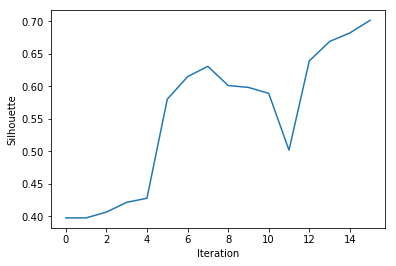

In [48]:
plt.plot(range(len(silhouettes)), silhouettes)
plt.xlabel("Iteration")
plt.ylabel("Silhouette")
plt.show()

In [49]:
# def to_str_names(b):
        
#     list_names = [] 
#     for a in b:
#         list_names.append(str(a[0]) +"\n" + str(a[1]) + "\n" + str(a[2]) + "\n")
        
#     return tuple(list_names)



# for (idx,this_fsm) in enumerate(fsm):
#     plt.figure()
    
#     x = np.arange(len(this_fsm))
#     prob = this_fsm.values()
    
#     x_names = to_str_names(this_fsm.keys())
#     plt.bar(x, prob)
    
#     plt.title("Iteration {}".format(idx))
#     plt.xticks(x, x_names)
#     plt.show()



In [50]:
# # finding the standard deviation of the probabilities

# std_prob = []

# for (i, this_fsm) in enumerate(fsm):
#     this_std = np.std(this_fsm.values())
#     print("{}, {}".format(i, this_std))
#     std_prob.append(this_std)

    
# plt.title("Standard deviation of probabilities over trials")
# plt.plot(range(len(std_prob)),std_prob)
# plt.show()
    

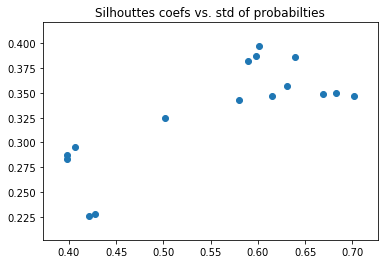

(0.78851843982909819, 0.00028402562988048315)


In [9]:
plt.title("Silhouttes coefs vs. std of probabilties")
plt.scatter(silhouettes,std_prob)
plt.show()

from scipy.stats.stats import pearsonr

print(pearsonr(silhouettes, std_prob))

# NOTES

next steps:

- some program to evaluate the accuracy of an FSM
- do this with an LSTM with 4 neurons instead of 8
- add 500+ artificial neurons
- bottom up approach, CLIQUE, ENCLUS

- baseline - clustering the columns of the activation matrix
- using mutual information, and then for each of those clusters
- find clusters within those subspaces

- use dni on fsm to interpret

- exhaustive approach, gain some more intuition, with pruning algorithms


- number of parentheses and plot it


- Make an assumption of what a "good" fsm looks like - clear clustering and high-entropy probability distribution
- for transitions

- Robustness - how far can a neuron deviate from the cluster centroids without breaking the FSM - RNN correspondence?


## Brute force approach to subspace extraction
Using a bottom-up exhaustive approach using the entropy-based subspace pruning method in http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.33.1465&rep=rep1&type=pdf. 

In [26]:
import subclustering as sc
reload(sc)

subspace_clusters = sc.bruteforce_prunesubspace(states, 
                                                sc.entropy_based, 
                                                sc.kmeans_wrapper, 
                                                1.0)



0it [00:00, ?it/s]

Considering collection of 1 neurons


16it [00:09,  1.76it/s]
0it [00:00, ?it/s]

Considering collection of 2 neurons


120it [00:58,  2.07it/s]
2it [00:00, 16.45it/s]

Considering collection of 3 neurons


560it [02:45,  3.38it/s]
2it [00:00, 13.22it/s]

Considering collection of 4 neurons


1820it [03:54,  7.77it/s]
2it [00:00, 17.02it/s]

Considering collection of 5 neurons


4368it [06:13, 11.70it/s]
2it [00:00, 15.73it/s]

Considering collection of 6 neurons


8008it [08:29, 15.72it/s]
2it [00:00, 15.26it/s]

Considering collection of 7 neurons


11440it [10:44, 17.74it/s]
2it [00:00, 15.22it/s]

Considering collection of 8 neurons


12870it [11:57, 17.95it/s]
2it [00:00, 15.04it/s]

Considering collection of 9 neurons


11440it [10:41, 17.83it/s]
2it [00:00, 13.65it/s]

Considering collection of 10 neurons


8008it [08:15, 16.15it/s]
2it [00:00, 13.76it/s]

Considering collection of 11 neurons


4368it [04:40, 15.58it/s]
2it [00:00, 12.78it/s]

Considering collection of 12 neurons


1820it [02:03, 14.75it/s]
2it [00:00, 13.02it/s]

Considering collection of 13 neurons


560it [00:39, 14.21it/s]
2it [00:00, 12.33it/s]

Considering collection of 14 neurons


120it [00:08, 13.77it/s]
2it [00:00, 12.25it/s]

Considering collection of 15 neurons


16it [00:01, 13.06it/s]
1it [00:00,  7.32it/s]


Considering collection of 16 neurons


NameError: name 'subspace_clustering' is not defined

maximum entropy = 2.26573085844
75 percentile cutoff: 1.42249723842


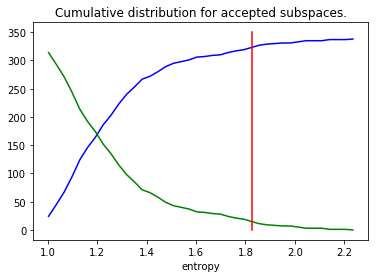

In [80]:
top_fifth_ent = np.percentile(data, 80)
top_quart_ent = np.percentile(data, 75)
top_95_ent = np.percentile(data, 95)

print("maximum entropy = {}".format(max(data)))
print("75 percentile cutoff: {}".format(top_quarter_ent))

data = [subspace_clusters[val][1] for val in subspace_clusters]
values, base = np.histogram(data, bins=40)
cumulative = np.cumsum(values)
plt.title("Cumulative distribution for accepted subspaces.")
plt.plot(base[:-1], cumulative, c="blue")
plt.plot(base[:-1], len(data)-cumulative, c="green")
plt.plot([top_95_ent, top_95_ent], [350,0], c="red")
plt.xlabel("entropy")


In [82]:
reload(sc)

## Experiment to see if filtering when noise is added.
N_random = 50

rand_activations = np.random.random((states.shape[0], N_random))
alt_states = np.hstack((states, rand_activations))
print("shape of artificial activation matrix: {}".format(alt_states.shape))

subspace_clusters = sc.bruteforce_prunesubspace(alt_states, 
                                                sc.entropy_based, 
                                                sc.kmeans_wrapper, 
                                                top_fifth_ent,
                                               delt=0.2) # increased delt 


0it [00:00, ?it/s]
16it [00:00, 158.08it/s]

shape of artificial activation matrix: (250000, 66)
Considering collection of 1 neurons



33it [00:00, 160.87it/s]
48it [00:00, 154.73it/s]
64it [00:00, 154.36it/s]
66it [00:00, 153.54it/s]
0it [00:00, ?it/s]
8it [00:00, 75.33it/s]

Considering collection of 2 neurons



16it [00:00, 76.06it/s]
23it [00:00, 73.92it/s]
31it [00:00, 74.88it/s]
39it [00:00, 75.64it/s]
46it [00:00, 73.00it/s]
53it [00:00, 67.81it/s]
60it [00:00, 67.66it/s]
69it [00:00, 69.54it/s]
79it [00:01, 71.83it/s]
89it [00:01, 73.61it/s]
99it [00:01, 75.19it/s]
Exception in thread Thread-47:
Traceback (most recent call last):
  File "/Users/ian.huang/anaconda3/envs/py27/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/Users/ian.huang/anaconda3/envs/py27/lib/python2.7/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/ian.huang/anaconda3/envs/py27/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration


108it [00:01, 75.89it/s]
117it [00:01, 76.30it/s]
127it [00:01, 77.31it/s]
136it [00:01, 77.16it/s]
145it [00:01, 77.07it/s]
154it [00:01, 77.27it/s]
163it [00:02, 77.39it/s]
172it [00:02, 77.55it/s]
181it [00:02, 77.7

Considering collection of 3 neurons


45760it [13:15, 57.53it/s]
6it [00:00, 50.48it/s]

Considering collection of 4 neurons


720720it [4:22:18, 45.79it/s]
5it [00:00, 42.48it/s]

Considering collection of 5 neurons


488569it [5:36:27, 24.20it/s]

KeyboardInterrupt: 

488569it [5:36:39, 24.19it/s]

In [ ]:
## checking if any of the artificial neurons made it into the top

# turn dictionary into a list, and then rank subspaces according to the 


## Transition extraction
Evaluation using gini coefficient
